# Training Models

## Loading in the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# load in all of the data
sodankyla = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/data/sodankyla_fpi/sodankyla_full_merged.csv")
kiruna = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/data/kiruna_fpi/kiruna_red_full_merged.csv")

sodankyla = sodankyla.loc[:, ~sodankyla.columns.str.contains('^Unnamed')]
kiruna = kiruna.loc[:, ~kiruna.columns.str.contains('^Unnamed')]

# all datetime columns need to be converted back to datetime from string as pandas cant save them in this format
sodankyla.datetime = pd.to_datetime(sodankyla.datetime)
kiruna.datetime = pd.to_datetime(kiruna.datetime)

In [2]:
sodankyla.head(5)

,datetime,date,year,month,day,time,mirror,lookDirection,azimuthAngle,intensity,...,light,rain,bartell_srn,bartell_day_number,Kp_value,ap_value,Ap,sunspot_number,observed_F10.7,adjusted_F10.7
0,2003-02-03 03:17:18,2003-02-03,2003,2,3,03:17:18,3,S,188.0,876.37,...,0.0,0.0,2314,2,3.000,15,22,59,132.5,128.7
1,2003-02-03 05:15:44,2003-02-03,2003,2,3,05:15:44,1,N,8.0,164.10,...,0.0,0.0,2314,2,2.667,12,22,59,132.5,128.7
2,2003-02-03 05:18:14,2003-02-03,2003,2,3,05:18:14,2,E,98.0,152.51,...,0.0,0.0,2314,2,2.667,12,22,59,132.5,128.7
3,2003-02-03 06:05:39,2003-02-03,2003,2,3,06:05:39,3,S,188.0,132.69,...,0.0,0.0,2314,2,2.667,12,22,59,132.5,128.7
4,2003-02-03 16:57:16,2003-02-03,2003,2,3,16:57:16,3,S,188.0,7.92,...,0.0,0.0,2314,2,4.000,27,22,59,132.5,128.7


In [3]:
sodankyla.keys()

Index(['datetime', 'date', 'year', 'month', 'day', 'time', 'mirror',
       'lookDirection', 'azimuthAngle', 'intensity', 'intensityError',
       'windSpeed', 'windSpeedError', 'windDirection', 'temp', 'tempError',
       'chiSquared', 'sigToNoiseRatio', 'sensorTemp', 'skyTemp', 'clarity',
       'light', 'rain', 'bartell_srn', 'bartell_day_number', 'Kp_value',
       'ap_value', 'Ap', 'sunspot_number', 'observed_F10.7', 'adjusted_F10.7'],
      dtype='object')

In [4]:
kiruna.head(5)

,datetime,date,year,month,day,time,mirror,lookDirection,azimuthAngle,intensity,...,light,rain,bartell_srn,bartell_day_number,Kp_value,ap_value,Ap,sunspot_number,observed_F10.7,adjusted_F10.7
0,2019-02-25 16:23:56,2019-02-25,2019,2,25,16:23:56,1,N,0.0,769.36,...,0.0,-0.2,2531,9,0.333,2,1,0,70.4,68.9
1,2023-02-01 15:41:37,2023-02-01,2023,2,1,15:41:37,12,Kir B,157.0,2231.23,...,0.0,0.0,2584,15,1.333,5,5,72,133.5,129.6
2,2023-02-01 15:42:13,2023-02-01,2023,2,1,15:42:13,3,S,180.0,2443.07,...,0.0,0.0,2584,15,1.333,5,5,72,133.5,129.6
3,2023-02-01 15:43:25,2023-02-01,2023,2,1,15:43:25,4,W,270.0,2993.80,...,0.0,0.0,2584,15,1.333,5,5,72,133.5,129.6
4,2023-02-01 15:44:08,2023-02-01,2023,2,1,15:44:08,1,N,0.0,2008.05,...,0.0,0.0,2584,15,1.333,5,5,72,133.5,129.6


In [5]:
kiruna[['windSpeed', 'azimuthAngle']]

,windSpeed,azimuthAngle
0,180.13,0.0
1,78.91,157.0
2,61.65,180.0
3,40.32,270.0
4,103.54,0.0
...,...,...
21660,16.70,0.0
21661,62.59,44.0
21662,138.31,90.0
21663,141.08,157.0


In [6]:
kiruna.keys()

Index(['datetime', 'date', 'year', 'month', 'day', 'time', 'mirror',
       'lookDirection', 'azimuthAngle', 'intensity', 'intensityError',
       'windSpeed', 'windSpeedError', 'windDirection', 'temp', 'tempError',
       'chiSquared', 'sigToNoiseRatio', 'sensorTemp', 'skyTemp', 'clarity',
       'light', 'rain', 'bartell_srn', 'bartell_day_number', 'Kp_value',
       'ap_value', 'Ap', 'sunspot_number', 'observed_F10.7', 'adjusted_F10.7'],
      dtype='object')

We're going to need ome type of regression algorithm to model relationships between the data

## Regression

Set parameters

In [7]:
# Common imports
import os
import numpy as np
np.random.seed(42) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
from tensorflow import keras

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

In [10]:
#list of weight initialisers we can use
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [11]:
#list of activation functions we can use
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'leaky_relu',
 'linear',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [12]:
#list of optimizers we can use
[m for m in dir(keras.optimizers) if not m.startswith("_")]

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lion',
 'LossScaleOptimizer',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'deserialize',
 'get',
 'legacy',
 'schedules',
 'serialize']

In [13]:
#reminder of the keys we can use in our dataframe 
sodankyla.keys()

Index(['datetime', 'date', 'year', 'month', 'day', 'time', 'mirror',
       'lookDirection', 'azimuthAngle', 'intensity', 'intensityError',
       'windSpeed', 'windSpeedError', 'windDirection', 'temp', 'tempError',
       'chiSquared', 'sigToNoiseRatio', 'sensorTemp', 'skyTemp', 'clarity',
       'light', 'rain', 'bartell_srn', 'bartell_day_number', 'Kp_value',
       'ap_value', 'Ap', 'sunspot_number', 'observed_F10.7', 'adjusted_F10.7'],
      dtype='object')

In [14]:
#selecting the keys we want to train the model with
X_df = sodankyla[['azimuthAngle', 'intensity',
       'windSpeed', 'sigToNoiseRatio', 'sensorTemp', 'skyTemp', 'clarity', 'light', 'rain',
       'bartell_srn', 'bartell_day_number', 'Kp_value', 'ap_value', 'Ap',
       'sunspot_number', 'observed_F10.7', 'adjusted_F10.7']]

#convert the df to numpy array as this is what tf wants
X = X_df.to_numpy()

#sleetc and convert the target to numpy array as this is what tf wants
y = sodankyla['temp'].to_numpy()

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [15]:
X_test_scaled.shape

(5366, 17)

In [16]:
def create_model():

    # Add layers with He initializat(ion
    model.add(Dense(64, input_dim=len(X_df.keys()), activation='leaky_relu', kernel_initializer='he_normal'))
    model.add(Dense(32, activation='leaky_relu', kernel_initializer='he_normal'))
    model.add(Dense(32, activation='leaky_relu', kernel_initializer='he_normal'))
    model.add(Dense(32, activation='leaky_relu', kernel_initializer='he_normal'))
    model.add(Dense(1, activation='relu', kernel_initializer='he_normal'))  # Output layer for regression

    model.summary()

    model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=["mean_absolute_percentage_error"])
    
    return model

In [17]:
#Initialize the neural network model
reset_state()
model = Sequential()

# set a bacth size for training
batch_size = 25

# Create a new instance of the model
model = create_model()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=batch_size, validation_split=0.1, verbose=1)


/Users/elliotdable/anaconda3/envs/research/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - loss: 801936.6250 - mean_absolute_percentage_error: 47.7644 - val_loss: 199645.4531 - val_mean_absolute_percentage_error: 28.7446
Epoch 2/250
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - loss: 196196.9844 - mean_absolute_percentage_error: 28.0699 - val_loss: 188419.5781 - val_mean_absolute_percentage_error: 27.7508
Epoch 3/250
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - loss: 184556.1094 - mean_absolute_percentage_error: 27.0846 - val_loss: 183226.1562 - val_mean_absolute_percentage_error: 27.1695
Epoch 4/250
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - loss: 178448.0469 - mean_absolute_percentage_error: 26.4110 - val_loss: 179543.5781 - val_mean_absolute_percentage_error: 26.6826
Epoch 5/250
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - loss: 174506.4375 - mean_absolute_percentage_error: 25.9207 - val_loss: 176685.2969 - val_mean_absolute_percentage_error: 26.2874
Epoch 6/250
1739/1739 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/ste

KeyboardInterrupt: 

In [ ]:
#model.save()

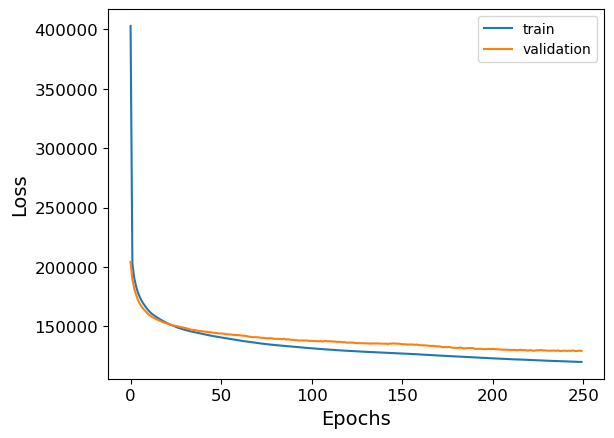

In [25]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0,100)
plt.legend()
plt.show()

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 138349.0469 - mean_absolute_percentage_error: 19.3116
Test Loss: [144617.828125, 19.86676788330078]
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


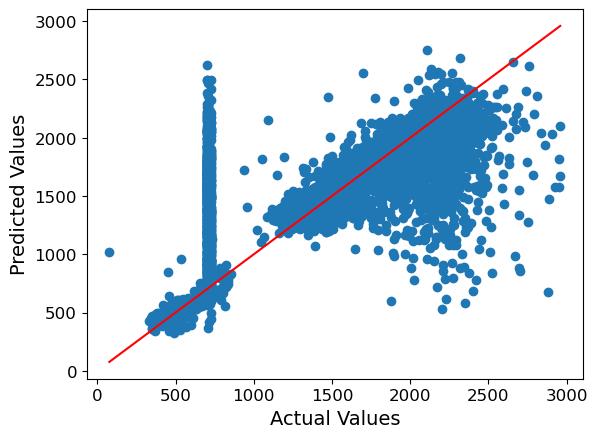

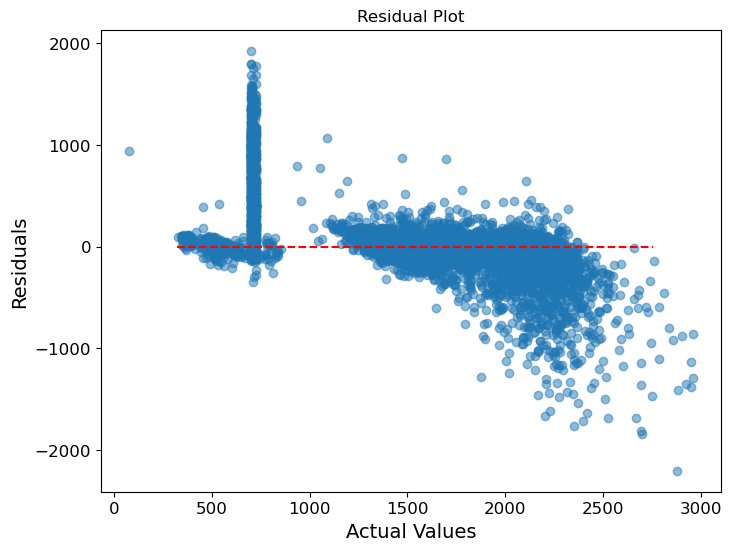

In [21]:

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

residuals = y_pred.reshape(-1) - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

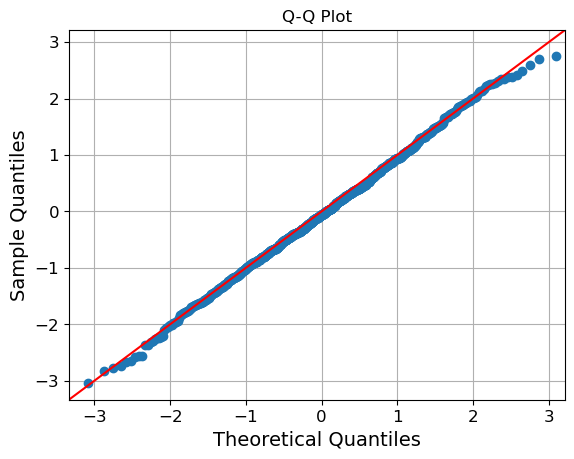

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate some sample data
np.random.seed(0)
data = np.random.normal(0, 1, 1000)  # Normally distributed data

# Create the Q-Q plot
fig = sm.qqplot(data, line='45')

# Customize the plot
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()
